# Abstract



MD Sami Uddin

muddi004@odu.edu

Portfolio: https://rayansami.github.io/

**Data** : Heart Failure Prediction

*   **URL** : [Heart Failure Dataset](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv)
*   **Description** : According to [WHO](https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1), every year 17.9M people die from heart disease and it is the number one cause for death globally. However, most of this death is preventable maintaining a healthy lifestyle, having the right diet, and avoiding tobacco. This dataset contains information on the age, tobacco intake. blood pressure, diabetes, and other blood cell level information of patients which can be useful to make inferences and building a predictive model.

**Goal** : My goal is to analyze this dataset and get insights into the impacts of harmful traits. I shall also build a predictive model to detect heart failure early.


# Loading the Dataset

In [49]:
# Get the file
# To keep everything simple and avoid complexity, I am importing the file from github
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split

#heart_failure_df = pd.read_csv(io.BytesIO(uploaded['heart_failure_clinical_records_dataset.csv']),index_col=0) # index_col=0 prevents indexes from showing up
heart_failure_df = pd.read_csv('https://raw.githubusercontent.com/rishabkoul/Heart_Failure_Predict/205e65e2c9ce861e99e2802f51a50932b0094162/heart_failure_clinical_records_dataset.csv')
heart_failure_df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Dataset Details

This dataset contains several aspect of details of 299 patients. I am going through on the data and explain briefly about the types of the data.

**Age** : Shows the age of the patient.

**Anemia**: It referes to the decrease of red blood cells or hemoglobin. This column is boolean and shows if a patient has it or not.

**Creatinine Phosphokinase** : Level of the CPK enzyme in the blood (mcg/L). It varies on gender, race or activity. However the normal range is 22 to 198 U/L (units per liter). It can also rise after a heart attack.

**Diabetes** : This columns shows if a patient has diabetes or not. Contains boolean value.

**Ejection Fraction** : 
The heart contracts and relaxes. When your heart contracts, it ejects blood from the two pumping chambers (ventricles). When your heart relaxes, the ventricles refill with blood.

This column contains percentage values of blood leaving the heart at each contraction.

**High Blood Pressure** : This column contains boolean values that shows if a patient has high blood pressure or not.

**Platelets** : Platelets count in the blood (kiloplatelets/mL). The normal platelet count is 150,000-350,000 per microliter of blood.

**Serum Creatinine** : This column contains the level of serum creatinine in the blood (mg/dL).

If your kidneys aren't functioning properly, an increased level of creatinine may accumulate in your blood. A serum creatinine test measures the level of creatinine in your blood and provides an estimate of how well your kidneys filter. 

Heart failure can reduce the blood flow to the kidneys, which can eventually increase the creatinine level and cause kidney failure if left untreated.

**Serum Sodium** : 
Level of serum sodium in the blood (mg/dL).


**Sex** : 
Woman or man(binary). 1 denotes to male and 0 denotes to female.                       

**Smoking** : 
If the patient smokes or not (boolean).

**Time** :  Follow-up period (days)

**Death Event** : If the patient deceased during the follow-up period. The values are boolean. 

### Bird's eye view of the table

Let's check the details of the dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column.

In [50]:
heart_failure_df.shape

(299, 13)

In [51]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


All the columns of this dataset are quantitative. Also, it appears there is no missing value in the table. However, I'll double check my assumption just to be sure.

In [52]:
heart_failure_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Let's understand little more about this dataset.

In [53]:
heart_failure_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [54]:
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Cleanup

### Verify redundancy in dataset

Going forward, it is necessary to make sure I do not have duplicate rows in my dataset. I'll make a temporary dataframe object and test if there is any redundency in the dataset.

In [55]:
# Make a temporary copy
temp_heart_failure_df = heart_failure_df.copy()
temp_heart_failure_df.drop_duplicates(inplace=True) # inplace= True will modify the DataFrame object in place
temp_heart_failure_df.shape

(299, 13)

This dataset has no duplicate row.

### Column cleanup

Let's check if the column names has typos, spaces, special characters etc. 

In [56]:
heart_failure_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Name are pretty neat already. I'll just make all of them lower case just to keep them in one form.

In [57]:
heart_failure_df.columns = [col.lower() for col in heart_failure_df.columns]
heart_failure_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

# EDA

Here I'll explore the dataset and try to determine which feature has the prominant impact to the event of death. So that later I can build a model based on these insights.

#### Effect of age

Let's check the age distribution


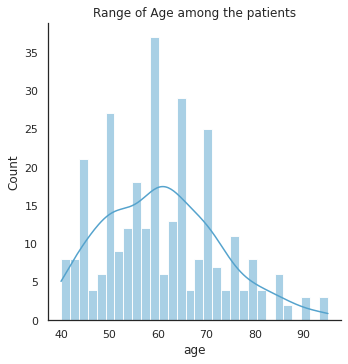

In [58]:
sns.displot(data=heart_failure_df, x="age", kde=True, bins= 30) # Fixed on bins=30 after trying out several values
plt.title('Range of Age among the patients')
plt.show()

Age wise most of the patients resides in roughly from 45 to 75 years range.

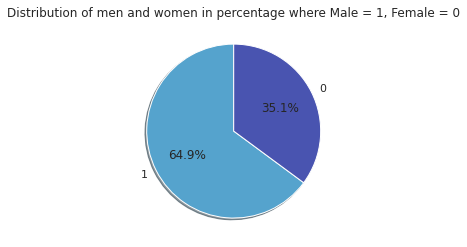

In [59]:
labels = heart_failure_df['sex'].unique()
sizes = heart_failure_df['sex'].value_counts()

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of men and women in percentage where Male = 1, Female = 0')
plt.show()

And in this age range about 64.9% are **male** and 35.1% are **female**.

I want to check the age wise spread of male and female individually.

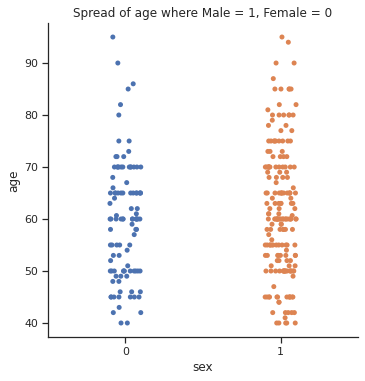

In [60]:
sns.set_theme(style="ticks")
sns.catplot(data=heart_failure_df, x="sex", y="age") # hue="smoker"
plt.title('Spread of age where Male = 1, Female = 0')
plt.show()

Although the number female in this dataset is lower, it represents all over the range. But the number of female representation is very low after the age of 70. Although the female one female patient here lived longer then any other patients in the dataset.

Let's see if there is any relation between age and death events.

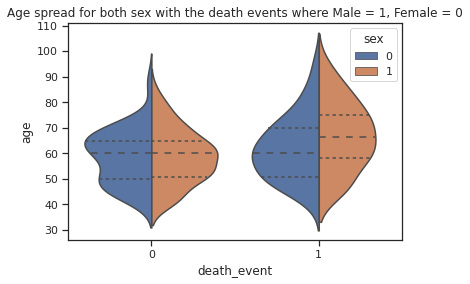

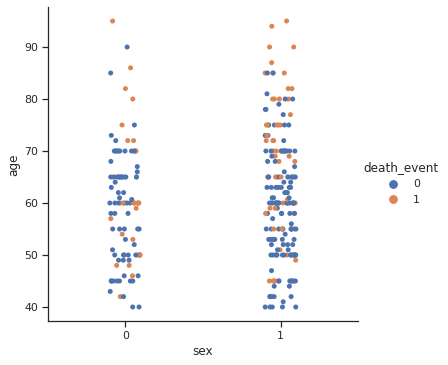

In [61]:
plt.title('Age spread for both sex with the death events where Male = 1, Female = 0')
sns.violinplot(data=heart_failure_df, y="age", x="death_event",inner='quartile',split ="True",hue="sex")
sns.set_theme(style="ticks")
sns.catplot(data=heart_failure_df, x="sex", y="age",hue="death_event")
plt.show()

This chart is giving very interesting insights. The more the age is, the higher the possibility of death. 

After 70, the death ratio of the patients are higher in most cases. Also, it looks like 60 is very mercurial period of life when heart failure peaks!
We need to becareful heart failure before reaching 50s, so that we can avaoid this after 60, specially after 70s. Just a thought!



Let's check **death ratio** between male and female.

In [62]:
pd.crosstab(heart_failure_df['sex'], heart_failure_df['death_event'])

death_event,0,1
sex,,
0,71,34
1,132,62


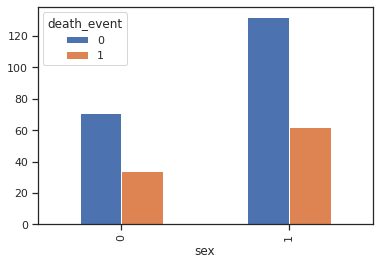

In [63]:
pd.crosstab(heart_failure_df['sex'], heart_failure_df['death_event']).plot(kind='bar')

Both are little lower then 50%. Although death ratio for women is higher than men, which is interesting! Because women generally live longer then men.  May be this event has no relation with that belief.

#### Are people with Anaemia dying more? 

Let's find out

In [64]:
pd.crosstab(heart_failure_df['anaemia'], heart_failure_df['death_event'])

death_event,0,1
anaemia,,
0,120,50
1,83,46


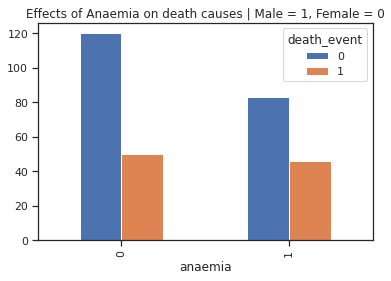

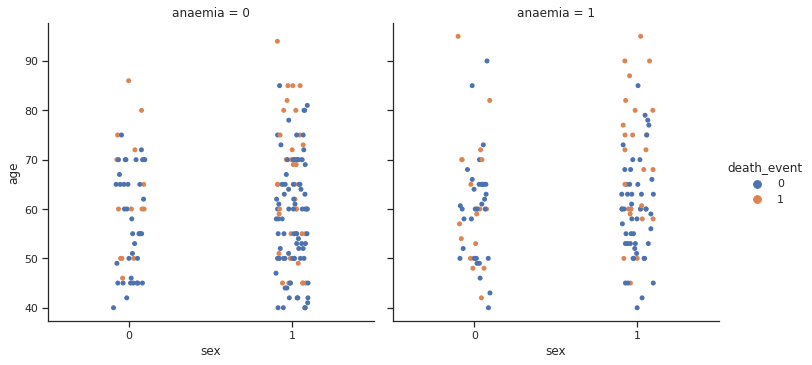

In [65]:
#anaemia
pd.crosstab(heart_failure_df['anaemia'], heart_failure_df['death_event']).plot(kind='bar')
plt.title('Effects of Anaemia on death causes | Male = 1, Female = 0')
sns.catplot(x="sex", y="age", hue="death_event",col="anaemia", data=heart_failure_df)
plt.show()

It appears, anemia does not have much effect on deaths overall.

Also, it looks like the death events are spread out evently on both male and female, with or without Anaemia. However, specially for male, death with Anaemia is more frequent then female after 70. But that does not tell me anything being a good reaseon for cardiac arrest, as death is also more or less frequent for males without anaemia after 70.

#### How about smoking?

In [66]:
pd.crosstab(heart_failure_df['smoking'], heart_failure_df['death_event'])

death_event,0,1
smoking,,
0,137,66
1,66,30


Text(0.5, 1.0, 'Smoking and death events')

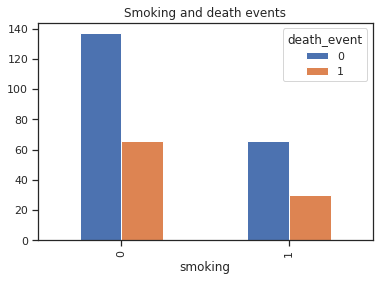

In [67]:
pd.crosstab(heart_failure_df['smoking'], heart_failure_df['death_event']).plot(kind='bar')
plt.title('Smoking and death events')

I thought smoking would show significant contribution to the death events. However, the ratio shows no noteworthy ratios for smoker and non-smoker. I believe there's other prominant factors!

But do men smoke more then women?

In [68]:
# smokers based on sex
pd.crosstab(heart_failure_df['sex'], heart_failure_df['smoking'])

smoking,0,1
sex,,
0,101,4
1,102,92


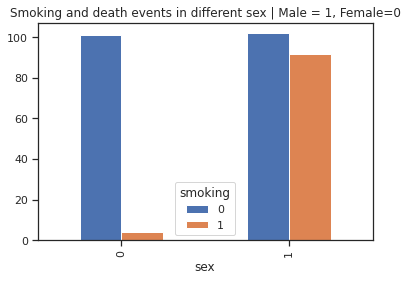

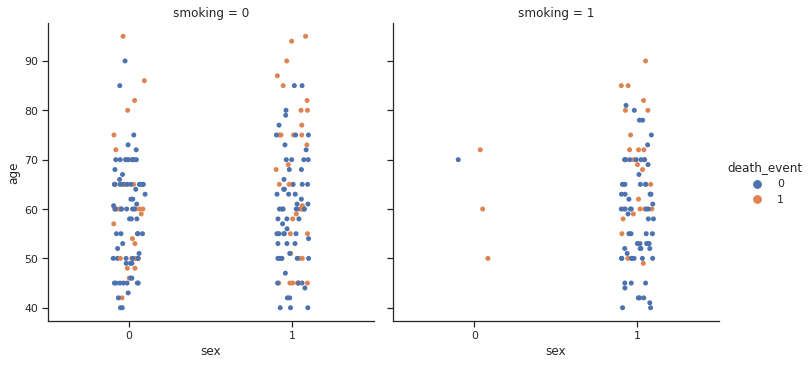

In [69]:
pd.crosstab(heart_failure_df['sex'], heart_failure_df['smoking']).plot(kind='bar')
plt.title('Smoking and death events in different sex | Male = 1, Female=0')
sns.catplot(x="sex", y="age", hue="death_event",col="smoking", data=heart_failure_df)

The answer is yes. It was expected that men are the prominant portion among the smokers. And the charts varify that.

#### Blood Pressure

Let's check the effect of blood pressume in the event of death.

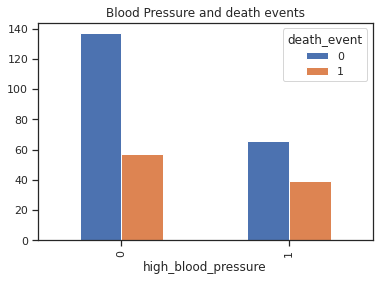

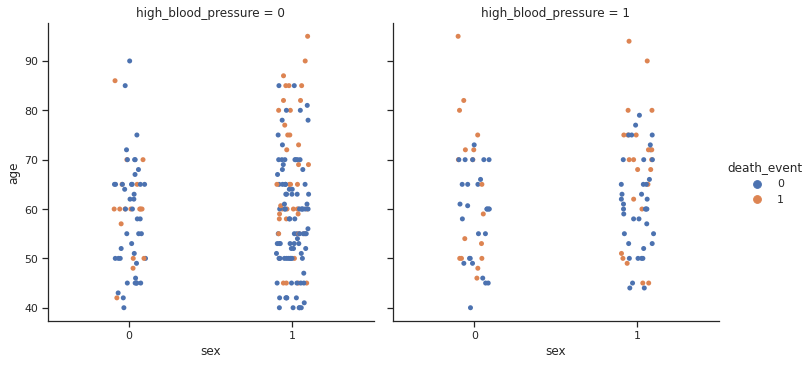

In [70]:
# high_blood_pressure
pd.crosstab(heart_failure_df['high_blood_pressure'], heart_failure_df['death_event']).plot(kind='bar')
plt.title('Blood Pressure and death events')

sns.catplot(x="sex", y="age", hue="death_event",col="high_blood_pressure", data=heart_failure_df)


Death rate was higher among those who had high blood pressure. And it's common between both male and female across all ages.


#### Impact of Creatinine Phosphokinase

Any relation between Creatinine Phosphokinase and Death event?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Creatinine Phosphokinase vs Death Events')

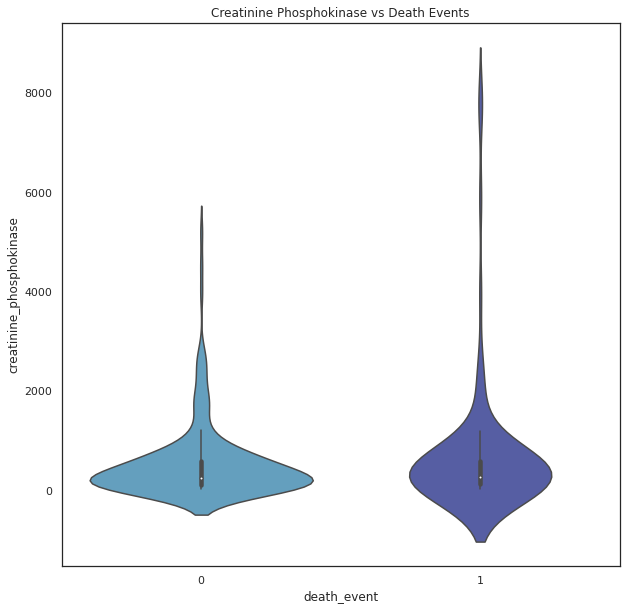

In [71]:
# creatinine_phosphokinase
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.set_palette('icefire')
sns.violinplot(heart_failure_df['death_event'],heart_failure_df['creatinine_phosphokinase'])
plt.title('Creatinine Phosphokinase vs Death Events')

This violin chart show that maximum data is concentrated under 1000 units of Creatinine Phosphokinase. I'll dive more and I'll check what's the scenerio there. 

Text(0.5, 1.0, 'Creatinine Phosphokinase vs Death Events for both Male and Female')

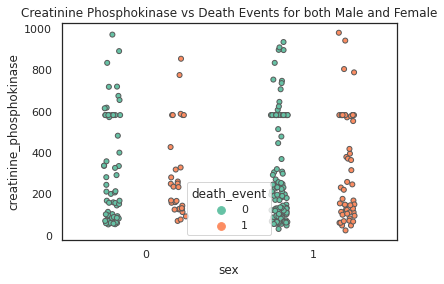

In [72]:
#sns.catplot(x="sex", y="creatinine_phosphokinase", hue="death_event", data=heart_failure_df)
heart_failure_df_cretiniePos1000Less = heart_failure_df[heart_failure_df["creatinine_phosphokinase"] < 1000]
sns.stripplot(x="sex", y="creatinine_phosphokinase", hue="death_event",data=heart_failure_df_cretiniePos1000Less,palette="Set2", dodge=True,linewidth=1)
plt.title('Creatinine Phosphokinase vs Death Events for both Male and Female')

I thought Creatinine Phosphokinase would be a major feature on the ultimate event. Normal range of this enzyme is 22 - 192 units per litre. That's why data is concentrated around 200 mostly. 

This enzyme gets higher in blood stream only when something is wrong inside our body. It can be brain injury, it can be heart attack. From this chart, I can not really decide on the determining factor of CPK. Because for both sex, the death ratio appears to be the same.

#### Effects from Ejected Fraction

Has Ejected Fraction has any contribution on death?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Ejected Fraction vs Death Events')

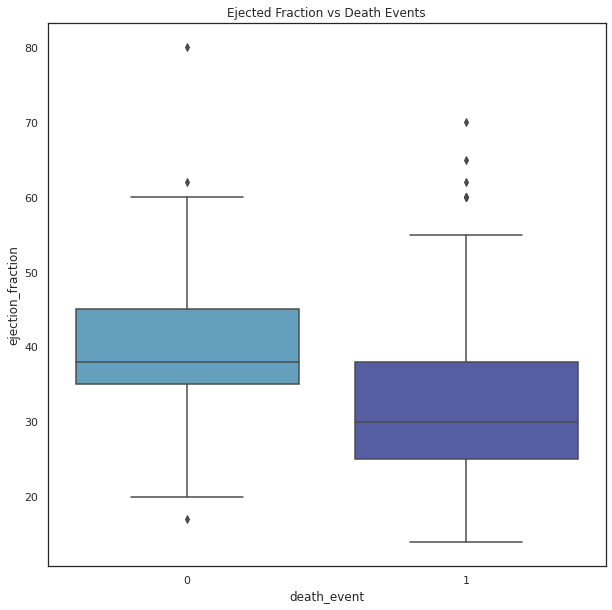

In [73]:
#ejection_fraction
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.set_palette('icefire')
sns.boxplot(heart_failure_df['death_event'],heart_failure_df['ejection_fraction'])
plt.title('Ejected Fraction vs Death Events')

I found that, without some exceptions, ejection fraction is lower among the deaths.

I am wondering how ejection fraction looks like to them who has high blood pressure?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Ejected Fraction vs High blood pressure')

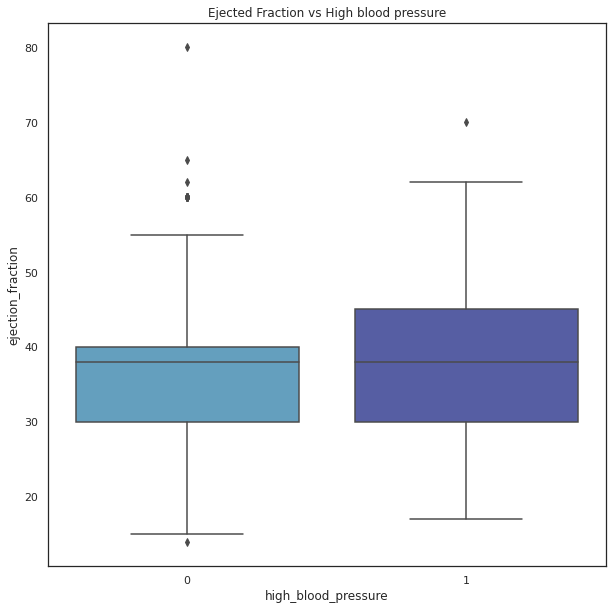

In [74]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.set_palette('icefire')
sns.boxplot(heart_failure_df['high_blood_pressure'],heart_failure_df['ejection_fraction'])
plt.title('Ejected Fraction vs High blood pressure')

I was hoping to see lower values on ejection fraction among them who have higher blood pressure(so that it matches with above chart). I found that the range is rather lower for healthy(without high blood pressure) patients. However, 50 percentile healthy patients are on the top of the range.

Let's dive a little more deeper with this chart.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



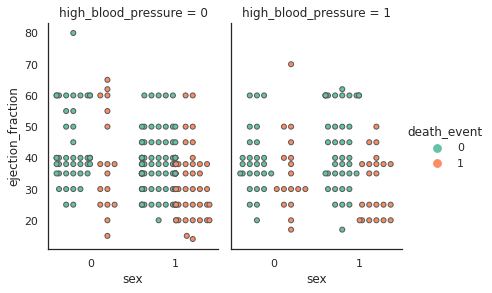

In [75]:
sns.catplot(x="sex", y="ejection_fraction",hue="death_event", col="high_blood_pressure",kind="swarm",data=heart_failure_df,height=4, aspect=.7,palette="Set2", dodge=True,linewidth=1);

From here I find that people with 40 unit or less ejection fraction are more susceptible to death.



#### Serum Creatinine

Let's check how impactful is Serum Creatinine level on blood in terms of heart failure.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Serum Creatinine vs Death Event')

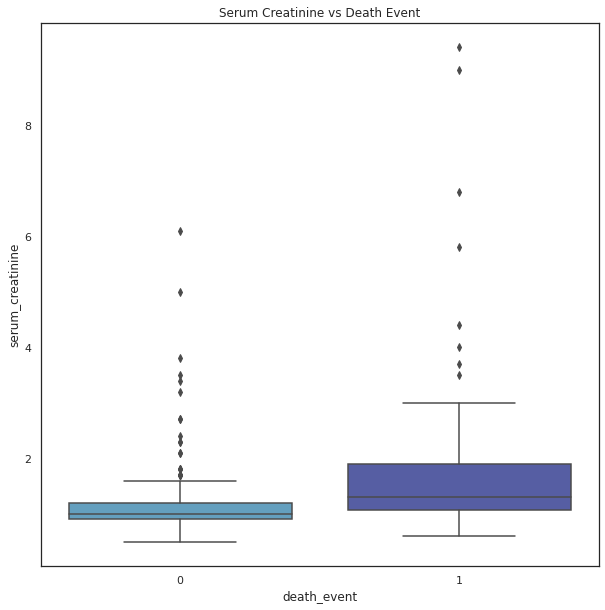

In [76]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.set_palette('icefire')
sns.boxplot(heart_failure_df['death_event'],heart_failure_df['serum_creatinine'])
plt.title('Serum Creatinine vs Death Event')


I was not honestly expecting this, but it looks like Serum Creatinine level on blood is a **very good indicator**, since get gets released on blood after the kidney gets a lower flow of blood due to heath failure. 

So we can say, Serum creatinine is a very good indicator of heart failure, but can we detect early using this? 

I'd quote from Journal of Cardiac Failure- "*We believe the more likely explanation is that increased creatinine levels during hospitalization are a marker of poor cardiac output, leading to diminished renal blood flow and reduced ability to tolerate inpatient heart failure treatment[5]*"

Text(0.5, 1.0, 'Serum Creatinine vs Death Event for both sex')

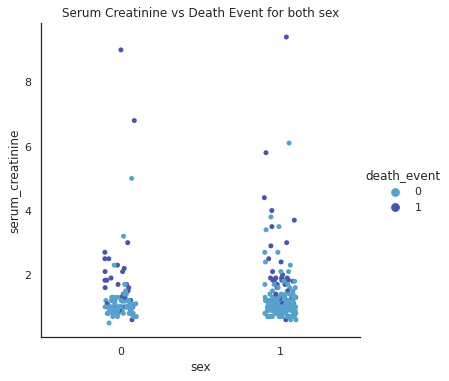

In [77]:
sns.catplot(x="sex", y="serum_creatinine", hue="death_event", data=heart_failure_df)
plt.title('Serum Creatinine vs Death Event for both sex')

It looks like serum creatinine level 1.5 or more is causing more death. It is a very good indicator.

#### Death relation with Platelets count

Is there any relation with platelets count and death event?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Plateletes vs Death Event')

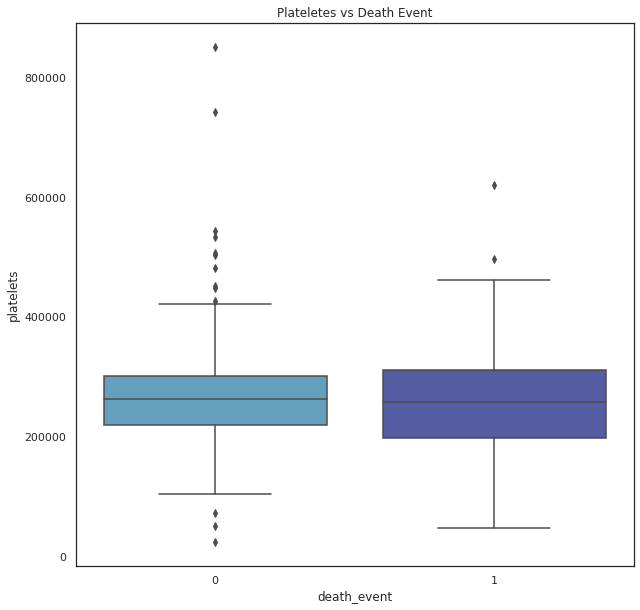

In [78]:
#platelets
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.set_palette('icefire')
sns.boxplot(heart_failure_df['death_event'],heart_failure_df['platelets'])
plt.title('Plateletes vs Death Event')

Text(0.5, 1.0, 'Platelets vs Death Event for both Male=1 and Female=0')

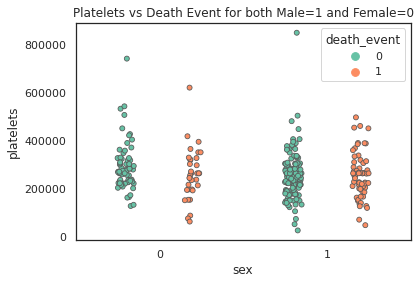

In [79]:
g = sns.stripplot(x="sex", y="platelets",hue="death_event",
                  data=heart_failure_df,palette="Set2", dodge=True, linewidth=0.8);
plt.title('Platelets vs Death Event for both Male=1 and Female=0')

It's hard to come up to any conclution from this visual chart. Tried to find anything for male or femlae specific, but the decision remained inconclusive.

In cardiovascular disease, abnormal clotting occurs that can result in heart attacks or stroke. Blood vessels injured by smoking, cholesterol, or high blood pressure develop cholesterol-rich build-ups (plaques) that line the blood vessel; these plaques can rupture and cause the platelets to form a clot. Even though no bleeding is occurring, platelets sense the plaque rupture and are confused, thinking that an injury has taken place that will cause bleeding. Instead of sealing the vessel to prevent bleeding as would occur with a cut, a clot forms in an intact blood vessel, causing a blockage of blood flow. Without blood, a portion of the heart muscle can die, leading to a heart attack[6]. And thus death may occur.


<img src="https://www.ahajournals.org/cms/asset/b725bb64-b898-42f3-9510-6b3b493471d7/1ff2.jpg" alt="drawing" width="400"/>

So I'll now check how the platelets count differ in patients with high blood pressure. 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Hight blood pressure vs Platelets')

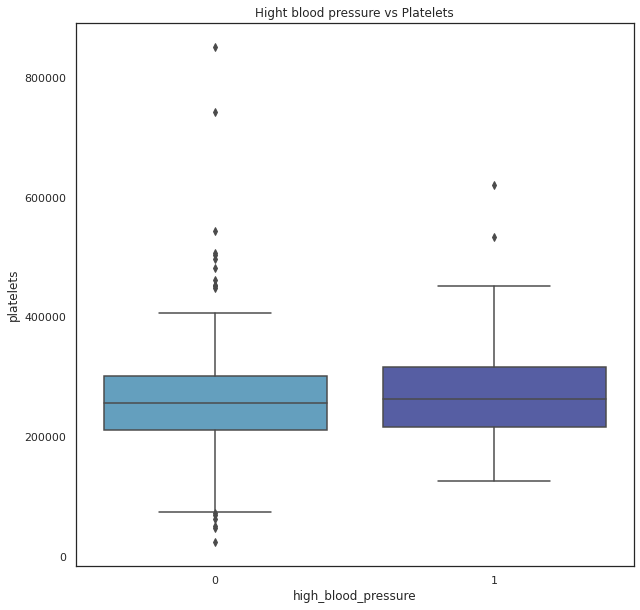

In [80]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.set_palette('icefire')
sns.boxplot(heart_failure_df['high_blood_pressure'],heart_failure_df['platelets'])
plt.title('Hight blood pressure vs Platelets')

The value range of platelets counts is higher for the patients with high blood pressure. Although it doesn't mean that it was caused by excessive platelets, but I can say there might be some chance among few.

#### Serum Sodium

Let's now look into Serum Sodium.

Hyponatremia or low serum sodium level is typically defined as a serum sodium concentration of <135 mEq/L and is one of the most common biochemical disorders featured in heart failure patients, with a prevalence close to 25% [2–4]. HF affects cardiac output by either decreasing heart rate or reducing the stroke volume[7].

Does our data reflect this statement from *The prognosis of heart failure patients: Does sodium level play a significant role?* Let's check serum sodium level vs death

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



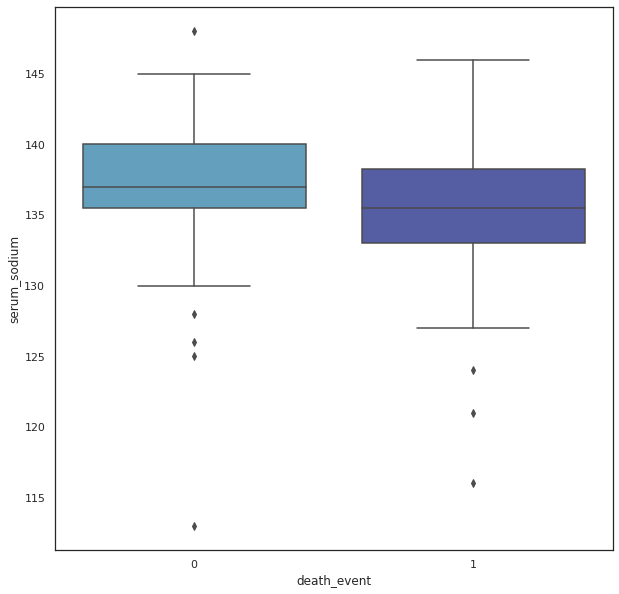

In [81]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.set_palette('icefire')
sns.boxplot(heart_failure_df['death_event'],heart_failure_df['serum_sodium'])

The statement is correct. 

The box plot representing the death has 50% of the patients who have serum level under 135.

#### Diabetes

I'll check how the diabetes level reflects to the patients who live and who die across the ages.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



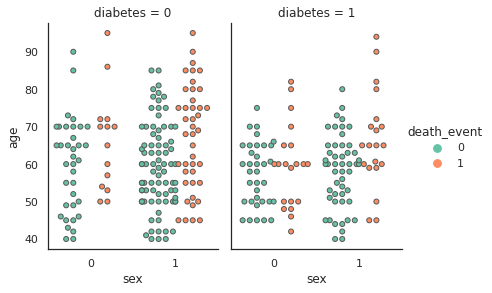

In [82]:
sns.catplot(x="sex", y="age",hue="death_event", col="diabetes",kind="swarm",
            data=heart_failure_df,height=4, aspect=.7,palette="Set2", dodge=True,linewidth=1);                  


If I only want to say for male, I can say diabetes is more deadly for men and the danger rises as they age. But overall, it can't be taken as determinant factor.

# Model for Prediction

In [83]:
import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

### Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

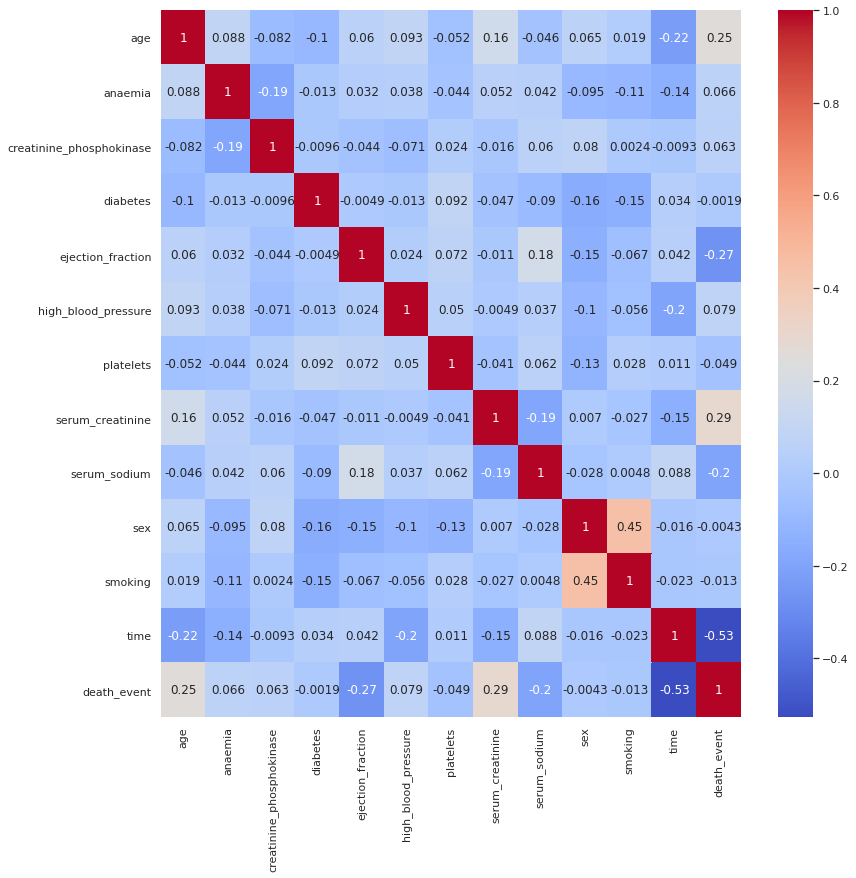

In [84]:
plt.figure(figsize=(13, 13))
sns.heatmap(heart_failure_df.corr(), cmap='coolwarm', annot=True)

From my research here, I found Serum Creatinine, Serum Sodium,High Blood Pressure and Ejection Fraction are very good indicator of heart failure. That's why, for building a machine learning model, I shall use them as my feature.

For my purpose I am going to use 80% data for training a model and 20% data for testing. I shall go over different models to find out which gives me the most accurate result.

And I am getting highest accuracy for Logistic Regression: 80%+

In [85]:
Features = ['high_blood_pressure','serum_sodium','ejection_fraction','serum_creatinine']
x = heart_failure_df[Features]
y = heart_failure_df['death_event']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)
accuracy_list = []


### Logistic Regression

In [86]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)
# Predicting the test set
logisticReg_prediction = logisticReg.predict(x_test)
logisticReg_accuracy = accuracy_score(y_test, logisticReg_prediction)
accuracy_list.append(100*logisticReg_accuracy)

<Figure size 432x288 with 0 Axes>

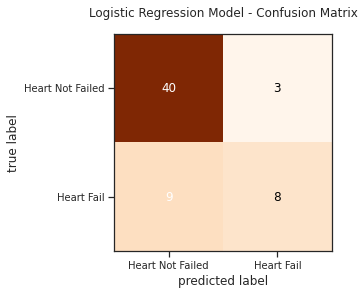

Accuracy of Logistic Regression is :  80.00%


In [87]:
cm = confusion_matrix(y_test, logisticReg_prediction)
plt.figure()
plot_confusion_matrix(cm, figsize=(8,4), hide_ticks=True, cmap=plt.cm.Oranges)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.show()

print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* logisticReg_accuracy))

### K Nearest Neighbor

I need to find optimum number of neighbour first, starting from 3.

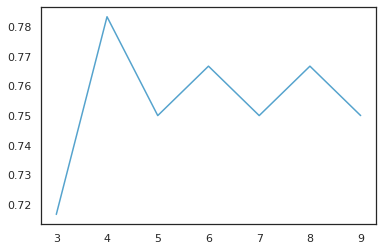

In [88]:
nlist = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    nlist.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), nlist)
plt.show()

<Figure size 432x288 with 0 Axes>

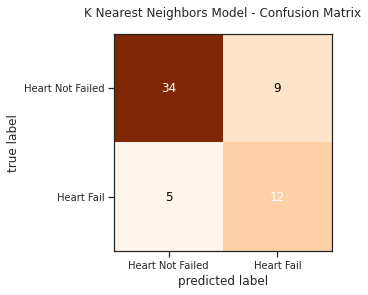

Accuracy of K Nearest Neighbors :  76.67%


In [89]:
kNeighbour = KNeighborsClassifier(n_neighbors=6)
kNeighbour.fit(x_train, y_train)

# Predicting the Test set results
kNeighbour_pred = kNeighbour.predict(x_test)

# Calculate confusion matrix and accuracy
kNeighbour_cm = confusion_matrix(y_test, kNeighbour_pred)
kNeighbour_accuracy = accuracy_score(y_test, kNeighbour_pred)

# Plot Confusion matrix
plt.figure()
plot_confusion_matrix(kNeighbour_cm, figsize=(8,4), hide_ticks=True, cmap=plt.cm.Oranges)
plt.title("K Nearest Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.show()

print("Accuracy of K Nearest Neighbors : ", "{:.2f}%".format(100* kNeighbour_accuracy))

### Random Forest

First I need to find the optimum number of n_estimators

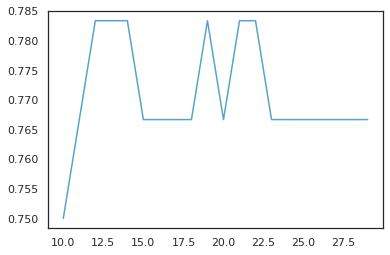

In [90]:
rlist = []
for estimators in range(10,30):
    randomForest = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    randomForest.fit(x_train, y_train)
    randomForest_pred = randomForest.predict(x_test)
    rlist.append(accuracy_score(y_test,randomForest_pred))

plt.plot(list(range(10,30)), rlist)
plt.show()

<Figure size 432x288 with 0 Axes>

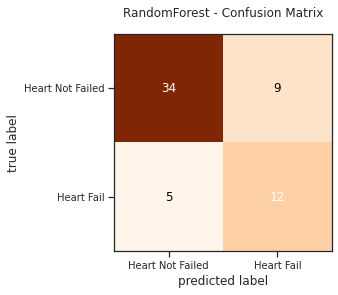

Accuracy of RandomForest :  76.67%


In [91]:
# Training the RandomForest Classifier
randomForest = RandomForestClassifier(n_estimators = 14, criterion='entropy', random_state=2)
randomForest.fit(x_train,y_train)
# Predicting the test set results
randomForest_pred = randomForest.predict(x_test)

# Calculate confusion matrix and accuracy
randomForest_cm = confusion_matrix(y_test, randomForest_pred)
randomForest_accuracy = accuracy_score(y_test, randomForest_pred)

# Plot Confusion matrix
plt.figure()
plot_confusion_matrix(randomForest_cm, figsize=(8,4), hide_ticks=True, cmap=plt.cm.Oranges)
plt.title("RandomForest - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.show()

print("Accuracy of RandomForest : ", "{:.2f}%".format(100* randomForest_accuracy))

### Decision Tree

First I need to Find the optimum number of max_leaf_nodes

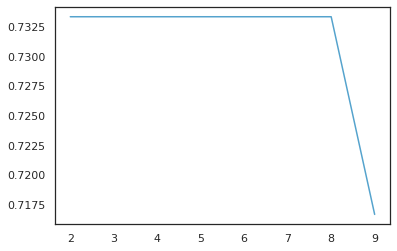

In [92]:
dlist = []
for leaves in range(2,10):
    decisionTree = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=2, criterion='entropy')
    decisionTree.fit(x_train, y_train)
    decisionTree_pred = decisionTree.predict(x_test)
    dlist.append(accuracy_score(y_test,decisionTree_pred))
plt.plot(list(range(2,10)), dlist)
plt.show()

<Figure size 432x288 with 0 Axes>

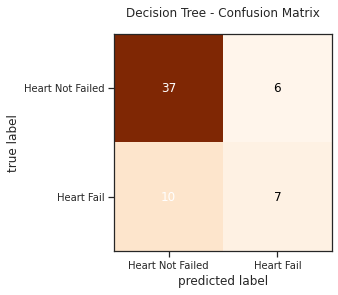

Accuracy of Decision Tree Classifier is :  73.33%


In [93]:
# Training the Decision Tree Classifier on the Training set

decisionTree = DecisionTreeClassifier(max_leaf_nodes = 2, random_state=0, criterion='entropy')
decisionTree.fit(x_train, y_train)
# Predicting the test set results
decisionTree_pred = decisionTree.predict(x_test)

# Calculate confusion matrix and accuracy
decisionTree_cm = confusion_matrix(y_test, decisionTree_pred)
decisionTree_accuracy = accuracy_score(y_test, decisionTree_pred)

# Plot Confusion matrix
plt.figure()
plot_confusion_matrix(decisionTree_cm, figsize=(8,4), hide_ticks=True, cmap=plt.cm.Oranges)
plt.title("Decision Tree - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.show()

print("Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* decisionTree_accuracy))

After trying with Logistic Regression, Random Forest, Decision Tree and KNN, I can say Logistic Regression model was the best.

Hope this can be used for life saving purpose.

# Summery

**Title**: Predicting heart failure and visualization of the traits



> By **MD Sami Uddin**



It's my first time I have taken a deeper look into heart failure and the causes of death. Previously I used to think that smoking and high blood pressure are the biggest factors of cardiac arrest. But now my outlook is changed and I found other major components that are responsible for the death.

The dataset contains information about 300 patients. The age range of the patients is from 40 to 90+. A large number of patients are from the 60s. And around 35% of the patient are female here. Each patient has a record of their various enzyme levels in the blood as well as behavioral traits such as smoking habits or diabetes. Therefore,  my primary goal was to go through each of these factors and see if that has any significant impact on overall death. I also tried to see the effects on male and female before getting to any conclusion.

On my exploration, I found the Serum Creatinine level is a great indicator for cardiac arrest. This enzyme is generated by the Kidney due to low blood flow in it. And I saw that the higher the level, the higher the chance for heart failure. Furthermore, I found the ejection fraction is lower among those who faced death. Moreover, for those who faced death events, more than 50% of them had lower than 135 units of this serum. It is clinically proven that a lower level of Serum Sodium level is a sign of a bodily biochemical disorder. And then comes the high blood pressure, which is kind of obvious in this scenario. 

During my search for the clues for death, I looked into factors like diabetes, platelet count, creatinine phosphokinase, smoking, and anemia. But I observed no noteworthy influences from them. 

My second goal was to develop a good prediction model. After discovering the crucial factors, I used them as ML features and ran them through a couple of ML algorithms. I spotted that Logistic Regression is the best for predicting early heart failure as It was giving me 80%+ accuracy. 

Future work may contain developing a model that will predict the failures more accurately. But while making it more accurate, one may also look into not making a model that overfits the training features.



# Presentation

[Click here](https://youtu.be/2GuBxz4JPO8) to go to the Youtube video of the presentation.

# References:

1. How to load data to Google Collab: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
2. Pandas for beginner: https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
3. Fundamental Steps to Complete a Data Analytics Project: https://blog.dataiku.com/2019/07/04/fundamental-steps-data-project-success
4. Data visualization with python cheat-sheet: https://towardsdatascience.com/your-ultimate-python-visualization-cheat-sheet-663318470db
5. https://www.onlinejcf.com/article/S1071-9164(02)25410-X/fulltext
6. Platelets and Cardiovascular Disease- https://www.ahajournals.org/doi/full/10.1161/01.CIR.0000086897.15588.4B
7. The prognosis of heart failure patients: Does sodium level play a significant role?- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6224129/
8. Seaborn catplot: https://seaborn.pydata.org/generated/seaborn.catplot.html
